# **PIA.- Entrenamiento de una red neuronal convolusional.**

---


**Equipo 7**

DANIELA SANDOVAL CASTILLO

ISRAEL NOLASCO ORTEGA DOMINGUEZ

JESUS ARTURO VAZQUEZ CASTRO

FELICIANO MORALES BARRON

VICTOR IMANOL VILLEGAS TORRES

# **Objetivo:**
Entrenar una red neuronal convolucional (CNN) en un conjunto de imagenes de libre elección.


# 1.- Importaciónn de librerías necesarias para el Proyecto

In [2]:
import numpy as np 
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import Conv2D,Flatten
from keras.layers import MaxPool2D
import numpy
import matplotlib.pyplot as plt
from tensorflow import keras
import warnings
from PIL import Image
warnings.filterwarnings('ignore')

# 2.-Proceso para importar el conjunto de datos desde kaggle 
Este es un conjunto de datos de muy alta calidad de imágenes de naipes. Todas las imágenes son 224 X 224 X 3 en formato jpg. Todas las imágenes del conjunto de datos se han recortado para que solo esté presente la imagen de una sola tarjeta y la tarjeta ocupe más del 50 % de los píxeles de la imagen. Hay 7624 imágenes de entrenamiento, 265 imágenes de prueba y 265 imágenes de validación. Los directorios de entrenamiento, prueba y validación se dividen en 53 subdirectorios, uno para cada uno de los 53 tipos de tarjetas. El conjunto de datos también incluye un archivo csv que se puede usar para cargar los conjuntos de datos.


2.1. Importamos y montamos la libreria para el drive.

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


2.2. Desde el drive, seleccionamos la carpeta que vamos a utilizar para almacenar nuestro conjunto de datos.

In [4]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/gdrive/MyDrive/Descargas de kaggle'

2.3. Nos aseguraos que ya nos encontremos ubicados en la carpeta deseada.

In [5]:
%cd /content/gdrive/MyDrive/Descargas de kaggle

/content/gdrive/MyDrive/Descargas de kaggle


2.4. Esta parte es opcional solo es para ver los archivos que tenemos almacenados en esa carpeta

In [6]:
!ls

'14card types-14-(200 X 200)-94.61.h5'	 kaggle.json	      Train_cards
'53cards-53-(200 X 200)-100.00.h5'	'PIA IntArtyRedNeu'   Train_cards.png
 cards.csv				 test		      valid
 cards-image-datasetclassification.zip	 train


2.5. Desde la pagina de Kaggle seleccionamos el conjuntod de datos a utilizar, copiamos la Api del conjunto de datos y en la siguiente linea de código realizamos al descarga del conjunto de datos.

In [7]:
!kaggle datasets download -d gpiosenka/cards-image-datasetclassification

cards-image-datasetclassification.zip: Skipping, found more recently modified local copy (use --force to force download)


2.6. Creamos un nuevo directorio o carpeta para almacenar las imagenes y los demas archivos a utilizarse, en nuestro caso lo nombramos Train_cards y es donde se moverán

In [8]:
!mkdir Train_cards
!mv cards.zip Train_cards

mkdir: cannot create directory ‘Train_cards’: File exists
mv: cannot stat 'cards.zip': No such file or directory


2.7. Con la siguiente instruccion constatamos que ya nos encontramos en la ubicacion del directorio creado anteriormente.

In [9]:
%cd Train_cards/

/content/gdrive/MyDrive/Descargas de kaggle/Train_cards


2.8. Con la libreria auxiliar cv2 que nos permita visualizar la imagen, seleccionamos del dierectorio creado una imagen que queramos mostrar para asegurarnos que ya se encuentra listo para trabajar con ellos.

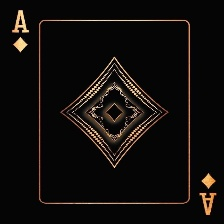

In [10]:
import cv2
from google.colab.patches import cv2_imshow
img=cv2.imread('/content/gdrive/MyDrive/Descargas de kaggle/Train_cards/test/ace of diamonds/2.jpg')
cv2_imshow(img)

# 3.-Realizamos el preprocesamiento de los datos

In [11]:
import os
for dirname, _, filenames in os.walk('/content/gdrive/MyDrive/Descargas de kaggle/Train_cards'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Se truncaron las últimas líneas 5000 del resultado de transmisión.
/content/gdrive/MyDrive/Descargas de kaggle/Train_cards/train/jack of spades/140.jpg
/content/gdrive/MyDrive/Descargas de kaggle/Train_cards/train/jack of spades/134.jpg
/content/gdrive/MyDrive/Descargas de kaggle/Train_cards/train/jack of spades/093.jpg
/content/gdrive/MyDrive/Descargas de kaggle/Train_cards/train/jack of spades/081.jpg
/content/gdrive/MyDrive/Descargas de kaggle/Train_cards/train/jack of spades/164.jpg
/content/gdrive/MyDrive/Descargas de kaggle/Train_cards/train/jack of spades/113.jpg
/content/gdrive/MyDrive/Descargas de kaggle/Train_cards/train/jack of spades/069.jpg
/content/gdrive/MyDrive/Descargas de kaggle/Train_cards/train/jack of spades/170.jpg
/content/gdrive/MyDrive/Descargas de kaggle/Train_cards/train/jack of spades/047.jpg
/content/gdrive/MyDrive/Descargas de kaggle/Train_cards/train/jack of spades/068.jpg
/content/gdrive/MyDrive/Descargas de kaggle/Train_cards/train/jack of spades/074.jp

3.1. En esta seccion realizamos el arreglo de las etiquetas predeterminadas nombrando la variable como variable_ds.

In [31]:
Train_ds=tf.keras.utils.image_dataset_from_directory("/content/gdrive/MyDrive/Descargas de kaggle/Train_cards/train",batch_size=32,image_size=(200,200),seed=56)
Test_ds=tf.keras.utils.image_dataset_from_directory("//content/gdrive/MyDrive/Descargas de kaggle/Train_cards/test",batch_size=32,image_size=(200,200),seed=56)
Valid_ds=tf.keras.utils.image_dataset_from_directory("/content/gdrive/MyDrive/Descargas de kaggle/Train_cards/valid",batch_size=32,image_size=(200,200),seed=56)
Class_Names=Train_ds.class_names

print(Class_Names)

Found 7624 files belonging to 53 classes.
Found 265 files belonging to 53 classes.
Found 265 files belonging to 53 classes.
['ace of clubs', 'ace of diamonds', 'ace of hearts', 'ace of spades', 'eight of clubs', 'eight of diamonds', 'eight of hearts', 'eight of spades', 'five of clubs', 'five of diamonds', 'five of hearts', 'five of spades', 'four of clubs', 'four of diamonds', 'four of hearts', 'four of spades', 'jack of clubs', 'jack of diamonds', 'jack of hearts', 'jack of spades', 'joker', 'king of clubs', 'king of diamonds', 'king of hearts', 'king of spades', 'nine of clubs', 'nine of diamonds', 'nine of hearts', 'nine of spades', 'queen of clubs', 'queen of diamonds', 'queen of hearts', 'queen of spades', 'seven of clubs', 'seven of diamonds', 'seven of hearts', 'seven of spades', 'six of clubs', 'six of diamonds', 'six of hearts', 'six of spades', 'ten of clubs', 'ten of diamonds', 'ten of hearts', 'ten of spades', 'three of clubs', 'three of diamonds', 'three of hearts', 'thre

3.2. Una vez definidas las eqtieutas con las que trabajaremos y redefinidas sus medidas, pasaremos a relizar un grafico para mostrar que ya estan listos para ser utilizados en la definciion del modelo a utilizar en la CNN.

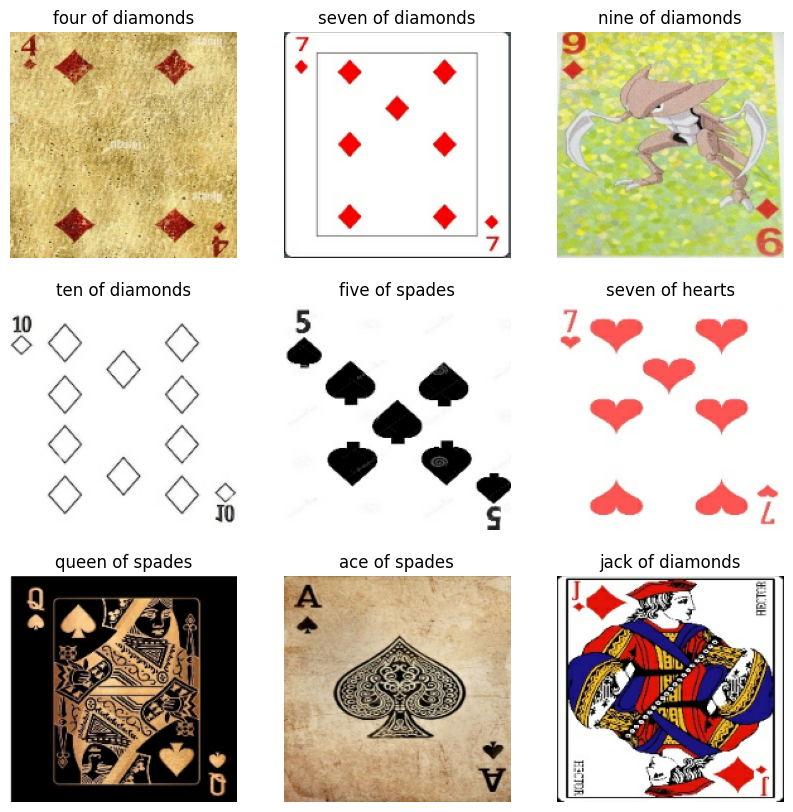

(32, 180, 180, 3)
(32,)


In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for images, labels in Test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(Class_Names[labels[i]])
        plt.axis("off")
plt.show()
for image_batch, labels_batch in Train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break


In [14]:
AUTOTUNE = tf.data.AUTOTUNE
Train_ds = Train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
Valid_ds = Valid_ds.cache().prefetch(buffer_size=AUTOTUNE)
num_classes=len(Class_Names)

# 4.-Procedemos a crear el modelo de la CNN para el entrenamiento en este caso es modelo secuencial.

In [27]:
model = tf.keras.Sequential([
    layers.Rescaling(1./255, input_shape=(200, 200, 3)),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Dropout(.2),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(num_classes)
])

4.1. Aquí podemos observar la arquitectura completa del modelo y el resumen de lo que llevamos.

In [44]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 200, 200, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 200, 200, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 100, 100, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 100, 100, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 50, 50, 64)       

Arriba, puede ver que la salida de cada capa Conv2D y MaxPooling2D es un tensor de forma 3D (alto, ancho, canales). Las dimensiones de ancho y alto tienden a reducirse a medida que se profundiza en la red.

# 5.-Compilamos y entrenamos el modelo

In [21]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history =model.fit(Train_ds,validation_data=Valid_ds,epochs=10)
epochs_range = range(10)
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
print(acc,val_acc,loss,val_loss)



Epoch 1/10
239/239 [==============================] - 25s 28ms/step - loss: 3.3494 - accuracy: 0.1599 - val_loss: 1.9644 - val_accuracy: 0.4226
Epoch 2/10
239/239 [==============================] - 6s 25ms/step - loss: 1.9844 - accuracy: 0.4752 - val_loss: 1.4067 - val_accuracy: 0.5887
Epoch 3/10
239/239 [==============================] - 6s 24ms/step - loss: 1.3674 - accuracy: 0.6314 - val_loss: 1.0820 - val_accuracy: 0.6717
Epoch 4/10
239/239 [==============================] - 7s 27ms/step - loss: 0.8986 - accuracy: 0.7444 - val_loss: 1.0559 - val_accuracy: 0.7170
Epoch 5/10
239/239 [==============================] - 6s 25ms/step - loss: 0.5825 - accuracy: 0.8317 - val_loss: 1.1194 - val_accuracy: 0.7170
Epoch 6/10
239/239 [==============================] - 6s 24ms/step - loss: 0.3627 - accuracy: 0.8939 - val_loss: 1.2040 - val_accuracy: 0.7132
Epoch 7/10
239/239 [==============================] - 6s 26ms/step - loss: 0.2694 - accuracy: 0.9225 - val_loss: 1.1647 - val_accuracy: 0.769

5.1. Anteriormente pudimos ver las asignaciones a los diferentes valores, en este caso, graficaremos las pérdidas en el entrenamiento y de igual forma lo haremos con la pescisión.

9/9 - 0s - loss: 1.4214 - accuracy: 0.7811 - 83ms/epoch - 9ms/step


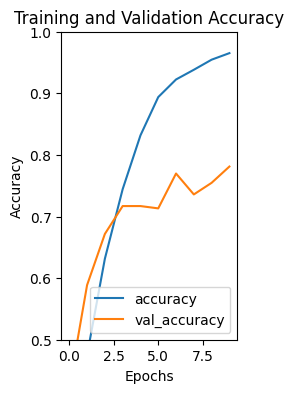

In [22]:
plt.figure(figsize=(5, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

test_loss, test_acc = model.evaluate(Valid_ds, verbose=2)

5.2. Podemos ver el valor de la precision

In [23]:
print(test_acc)

0.7811321020126343


# 6.- Predicciones

En este caso nuestro modelo ya es capaz de realizar predicciones, para lo cual vamos a realizar primero una prediccion y luego las 10 predicciones que se nos solicita.

Primero probamos con una predicción

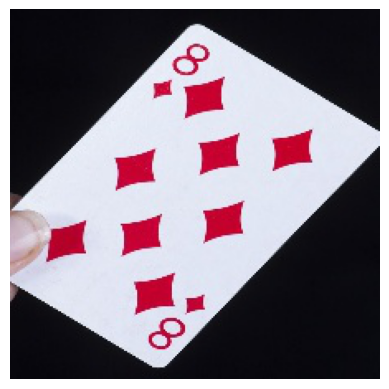

1/1 [==============================] - 0s 26ms/step
La imagen es de la clase: four of hearts


In [35]:
image_path = '/content/gdrive/MyDrive/Descargas de kaggle/Train_cards/train/eight of diamonds/001.jpg'

image = plt.imread(image_path)
plt.imshow(image)
plt.axis('off')
plt.show()

image = Image.open(image_path).resize((200, 200))
image = np.array(image)
image = np.expand_dims(image, axis=0)
image = image / 255.0

prediction = model.predict(image)
class_index = np.argmax(prediction)
class_names = Train_ds.class_names
predicted_class = class_names[class_index]

print('La imagen es de la clase:', predicted_class)

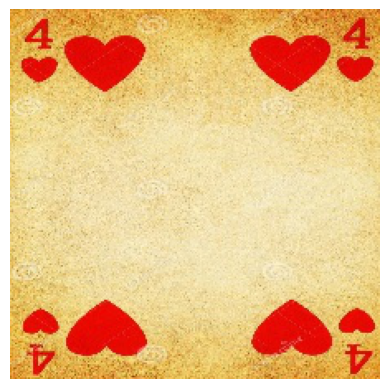

1/1 [==============================] - 0s 35ms/step
La imagen es de la clase: eight of diamonds


In [36]:
image_path = '/content/gdrive/MyDrive/Descargas de kaggle/Train_cards/train/four of hearts/001.jpg'

image = plt.imread(image_path)
plt.imshow(image)
plt.axis('off')
plt.show()

image = Image.open(image_path).resize((200, 200))
image = np.array(image)
image = np.expand_dims(image, axis=0)
image = image / 255.0

prediction = model.predict(image)
class_index = np.argmax(prediction)
class_names = Train_ds.class_names
predicted_class = class_names[class_index]

print('La imagen es de la clase:', predicted_class)

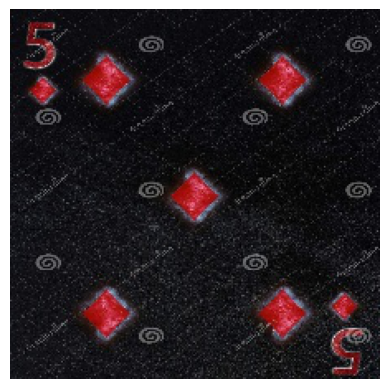

1/1 [==============================] - 0s 21ms/step
La imagen es de la clase: eight of diamonds


In [34]:
image_path = '/content/gdrive/MyDrive/Descargas de kaggle/Train_cards/train/five of diamonds/003.jpg'

image = plt.imread(image_path)
plt.imshow(image)
plt.axis('off')
plt.show()

image = Image.open(image_path).resize((200, 200))
image = np.array(image)
image = np.expand_dims(image, axis=0)
image = image / 255.0

prediction = model.predict(image)
class_index = np.argmax(prediction)
class_names = Train_ds.class_names
predicted_class = class_names[class_index]

print('La imagen es de la clase:', predicted_class)

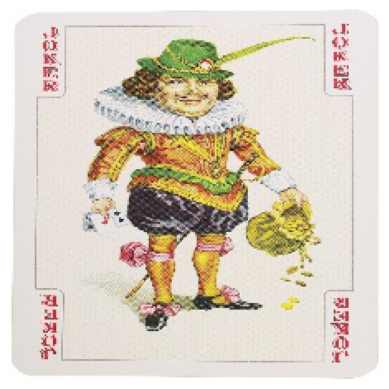

1/1 [==============================] - 0s 21ms/step
La imagen es de la clase: eight of diamonds


In [37]:
image_path = '/content/gdrive/MyDrive/Descargas de kaggle/Train_cards/train/joker/003.jpg'

image = plt.imread(image_path)
plt.imshow(image)
plt.axis('off')
plt.show()

image = Image.open(image_path).resize((200, 200))
image = np.array(image)
image = np.expand_dims(image, axis=0)
image = image / 255.0

prediction = model.predict(image)
class_index = np.argmax(prediction)
class_names = Train_ds.class_names
predicted_class = class_names[class_index]

print('La imagen es de la clase:', predicted_class)

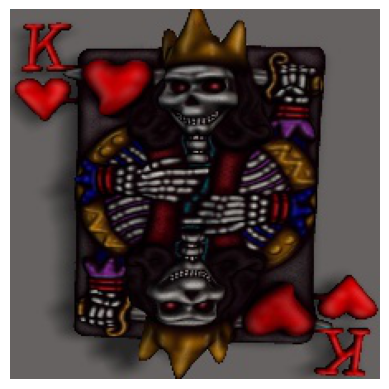

1/1 [==============================] - 0s 20ms/step
La imagen es de la clase: eight of diamonds


In [38]:
image_path = '/content/gdrive/MyDrive/Descargas de kaggle/Train_cards/train/king of hearts/001.jpg'

image = plt.imread(image_path)
plt.imshow(image)
plt.axis('off')
plt.show()

image = Image.open(image_path).resize((200, 200))
image = np.array(image)
image = np.expand_dims(image, axis=0)
image = image / 255.0

prediction = model.predict(image)
class_index = np.argmax(prediction)
class_names = Train_ds.class_names
predicted_class = class_names[class_index]

print('La imagen es de la clase:', predicted_class)

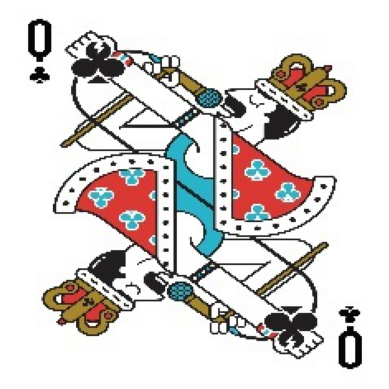

1/1 [==============================] - 0s 21ms/step
La imagen es de la clase: eight of diamonds


In [39]:
image_path = '/content/gdrive/MyDrive/Descargas de kaggle/Train_cards/train/queen of clubs/001.jpg'

image = plt.imread(image_path)
plt.imshow(image)
plt.axis('off')
plt.show()

image = Image.open(image_path).resize((200, 200))
image = np.array(image)
image = np.expand_dims(image, axis=0)
image = image / 255.0

prediction = model.predict(image)
class_index = np.argmax(prediction)
class_names = Train_ds.class_names
predicted_class = class_names[class_index]

print('La imagen es de la clase:', predicted_class)

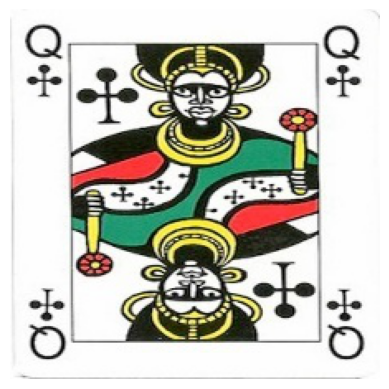

1/1 [==============================] - 0s 78ms/step
La imagen es de la clase: eight of diamonds


In [40]:
image_path = '/content/gdrive/MyDrive/Descargas de kaggle/Train_cards/train/queen of clubs/012.jpg'

image = plt.imread(image_path)
plt.imshow(image)
plt.axis('off')
plt.show()

image = Image.open(image_path).resize((200, 200))
image = np.array(image)
image = np.expand_dims(image, axis=0)
image = image / 255.0

prediction = model.predict(image)
class_index = np.argmax(prediction)
class_names = Train_ds.class_names
predicted_class = class_names[class_index]

print('La imagen es de la clase:', predicted_class)

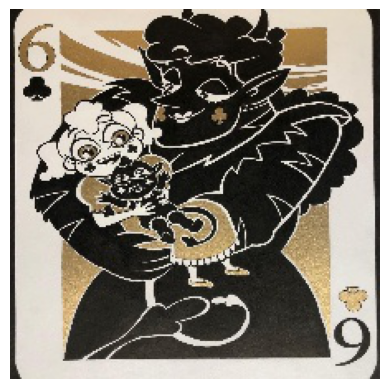

1/1 [==============================] - 0s 35ms/step
La imagen es de la clase: six of diamonds


In [41]:
image_path = '/content/gdrive/MyDrive/Descargas de kaggle/Train_cards/train/six of clubs/003.jpg'

image = plt.imread(image_path)
plt.imshow(image)
plt.axis('off')
plt.show()

image = Image.open(image_path).resize((200, 200))
image = np.array(image)
image = np.expand_dims(image, axis=0)
image = image / 255.0

prediction = model.predict(image)
class_index = np.argmax(prediction)
class_names = Train_ds.class_names
predicted_class = class_names[class_index]

print('La imagen es de la clase:', predicted_class)

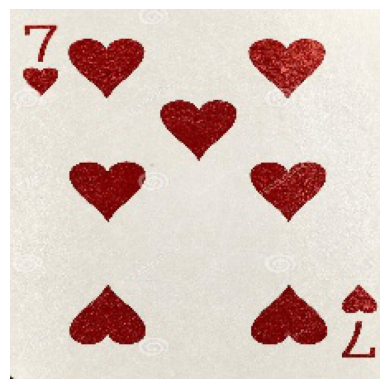

1/1 [==============================] - 0s 24ms/step
La imagen es de la clase: eight of diamonds


In [42]:
image_path = '/content/gdrive/MyDrive/Descargas de kaggle/Train_cards/train/seven of hearts/004.jpg'

image = plt.imread(image_path)
plt.imshow(image)
plt.axis('off')
plt.show()

image = Image.open(image_path).resize((200, 200))
image = np.array(image)
image = np.expand_dims(image, axis=0)
image = image / 255.0

prediction = model.predict(image)
class_index = np.argmax(prediction)
class_names = Train_ds.class_names
predicted_class = class_names[class_index]

print('La imagen es de la clase:', predicted_class)

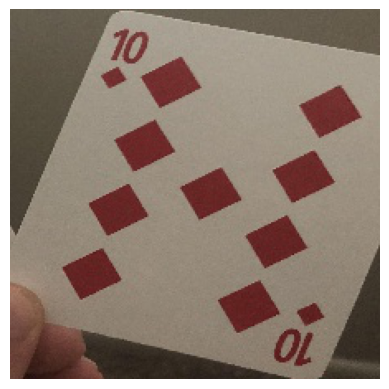

1/1 [==============================] - 0s 21ms/step
La imagen es de la clase: eight of diamonds


In [43]:
image_path = '/content/gdrive/MyDrive/Descargas de kaggle/Train_cards/train/ten of diamonds/001.jpg'

image = plt.imread(image_path)
plt.imshow(image)
plt.axis('off')
plt.show()

image = Image.open(image_path).resize((200, 200))
image = np.array(image)
image = np.expand_dims(image, axis=0)
image = image / 255.0

prediction = model.predict(image)
class_index = np.argmax(prediction)
class_names = Train_ds.class_names
predicted_class = class_names[class_index]

print('La imagen es de la clase:', predicted_class)

Al final ninguna predicción fue cumplida a pesar de tener mas del 80% de presición de la red.